# Importando depenências

In [1]:
import itertools as it
import matplotlib.pyplot as plt
import networkx as nx

# Declaração do grafo

In [16]:
class Graph:
    def __init__(self):
        self.graph = dict()

    def addEdge(self, node1, node2, edgeName):
        if node1 not in self.graph:
            self.graph[node1] = []
        if node2 not in self.graph:
            self.graph[node2] = []

        self.graph[node1].append((node2, str(edgeName)))
        

    def printGraph(self):
        for source, destination in self.graph.items():
            print(f"{source}-->{destination}")
    
    
    def BFS_shortest_path(self, node1, node2):
        path_list = [[node1]]
        edge_list = [[]]

        final_artists_path = []
        final_songs_path = []
        paths_counter = 0
        
        path_index = 0
        
        # To keep track of previously visited nodes
        previous_nodes = {node1}
        if node1 == node2:
            return path_list[0]
            
        while path_index < len(path_list):
            current_path = path_list[path_index]
            current_edges = edge_list[path_index]
            last_node = current_path[-1]
            next_nodes = self.graph[last_node]
            
            # Search goal node
            for n_node in next_nodes:
                if node2 == n_node[0]:
                    current_edges.append(n_node[1])
                    current_path.append(n_node[0])
                    
                    final_artists_path.append(current_path)
                    final_songs_path.append(current_edges)
                    paths_counter += 1

                    if paths_counter == 3:
                        return final_artists_path, final_songs_path
            
            # Add new paths
            for next_node in next_nodes:
                if not next_node in previous_nodes:
                    n_node = next_node[0]
                    n_edge = next_node[1]

                    new_path = current_path[:]
                    new_path.append(n_node)

                    new_path_edge = current_edges[:]
                    new_path_edge.append(n_edge)
                    
                    path_list.append(new_path)
                    edge_list.append(new_path_edge)
                    
                    # To avoid backtracking
                    previous_nodes.add(next_node)
            
            # Continue to next path in list
            path_index += 1
        
        
        if paths_counter > 0:
            return final_artists_path, final_songs_path  
        else:
            return []


# Carregando arquivo

In [18]:
g = Graph()

with open("grafos.txt", encoding="utf8") as f:
    lines = f.readlines()

# Adicionando artistas e músicas ao grafo

In [4]:
for i in range(int(len(lines))):
    edge, nodes = lines[i].replace("'", '').replace('"', '').split('|')
    nodesList = nodes.replace('\n', '').split(',')
    perm = it.permutations(nodesList, 2)

    for nodeCombination in list(perm):
        g.addEdge(nodeCombination[0], nodeCombination[1], edge)

# Encontrando menor caminho entre artistas

In [5]:
path_singers, path_songs = g.BFS_shortest_path("Anitta", "Ivete Sangalo")

print(path_singers)
print(path_songs)

['Anitta', 'Pabllo Vittar', 'Ivete Sangalo']
['Sua Cara', 'Lovezinho (feat. Ivete Sangalo)']


# Configurando grafo para representação

In [6]:
G = nx.Graph()
singers_it = iter(path_singers)
for i in singers_it:
    for j in path_songs:
        try:
            G.add_edge(i, singers_it.__next__(), song=j)
        except StopIteration as e:
            break

# Plot

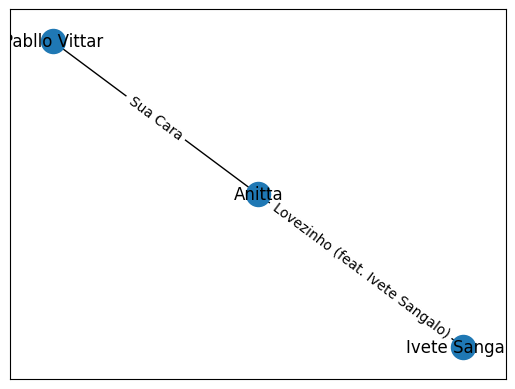

In [7]:
songs = nx.get_edge_attributes(G,'song')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels = songs)
plt.show()